In [1]:
import matplotlib.pyplot as plt
import numpy
import scipy.signal

In [2]:
Ts = 0.1
a = 0.5
b = 0.7
G = scipy.signal.dlti([1, 1], numpy.convolve([1, -a],[1, -b]), dt=Ts)
G

TransferFunctionDiscrete(
array([1., 1.]),
array([ 1.  , -1.2 ,  0.35]),
dt: 0.1
)

In [3]:
sampledt, impulse_response = G.impulse(n=numpy.int(2.5/Ts))

<StemContainer object of 3 artists>

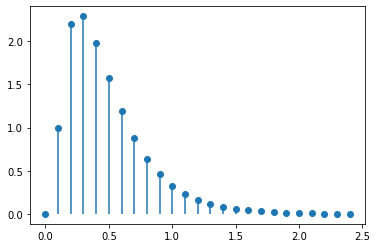

In [4]:
plt.stem(sampledt, numpy.squeeze(impulse_response), use_line_collection=True, basefmt=" ")

In [5]:
sampledt, step_response = G.step(n=numpy.int(2.5/Ts))

<StemContainer object of 3 artists>

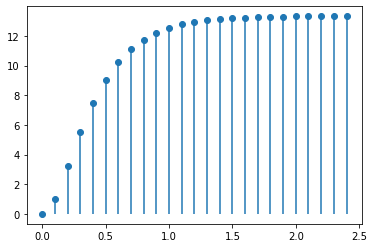

In [6]:
plt.stem(sampledt, numpy.squeeze(step_response), use_line_collection=True, basefmt=" ")

In [7]:
t = numpy.arange(0, 10+Ts, Ts)
u = numpy.sin(t)
sampledt, sine_response = scipy.signal.dlsim(G, u, t = t)

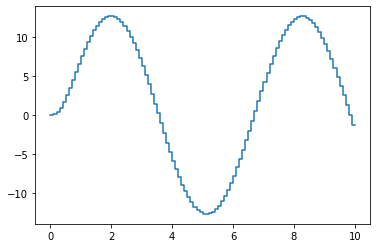

In [8]:
plt.step(sampledt, sine_response)

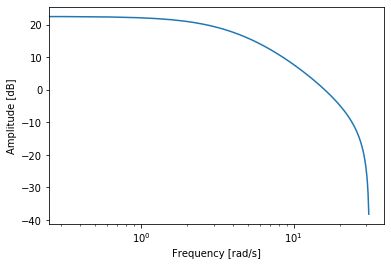

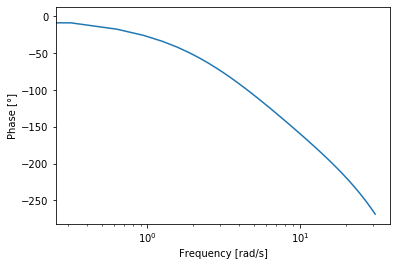

In [9]:
w, mag, phase = scipy.signal.dbode(G)

plt.figure()
plt.semilogx(w, mag)    # Bode magnitude plot
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Amplitude [dB]')
plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Phase [°]')
plt.show()